In [1]:
import numpy as np
import matplotlib.pyplot as plt
import arrow
import datetime
import xarray as xr
import os
import cmocean.cm as cm
import matplotlib.cm as cma
import scipy.interpolate as interp
from matplotlib.collections import PatchCollection
import matplotlib.dates as mpl_dates
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FormatStrFormatter
import datetime as dt 
from matplotlib.patches import Rectangle
from IPython.display import Image, display
import pandas as pd
from salishsea_tools import viz_tools, places, visualisations

### Import Functions

In [16]:
def draw_patches(gridY,ll, ul, w_depths,m2lon,back=False):
    latgridf = gridY
    fmask = mesh.vmask[0, :, latgridf]
    tmask = mesh.tmask[0,:,latgridf]
            
    f_lons = mesh.glamf[0, latgridf]
    u_lons = mesh.glamv[0, latgridf]
    w_depths = mesh.gdepw_1d
    w_depths = mesh.gdepv[0,:,300,230]

    topo = []
    if back == False: 
        for i in range(ll, ul+1):
            for j in range(39):
                if (fmask[j, i]== 0):
                    try:
                        rect = Rectangle((u_lons[i-1]/m2lon, w_depths[j-1]), u_lons[i]/m2lon-u_lons[i-1]/m2lon, w_depths[j]-w_depths[j-1])
                        topo.append(rect)
                    except:
                        pass
    else:
         for i in range(ll, ul+2):
            for j in range(39):
                if (fmask[j, i]== 0):
                    try:
                        rect = Rectangle((u_lons[i-2]/m2lon, w_depths[j]), u_lons[i-1]/m2lon-u_lons[i-2]/m2lon, w_depths[j+1]-w_depths[j])
                        topo.append(rect)
                    except:
                        pass         
    pc = PatchCollection(topo, facecolors='lightgray', edgecolors='none')
    return(pc)

### Monthly Averaged Mean Velocity

In [3]:
haro_x = np.arange(217,242,1)
haro_y = np.linspace(300,300,len(haro_x))



### Import data

In [4]:
data = xr.open_dataset('/ocean/cstang/MOAD/analysis-camryn/Ariane/for_jan18/for_straight_01jan18_s7t28/ariane_positions_quantitative.nc')
# df = interp.interp1d(mesh.z,mesh.gdepw_1d)

### January

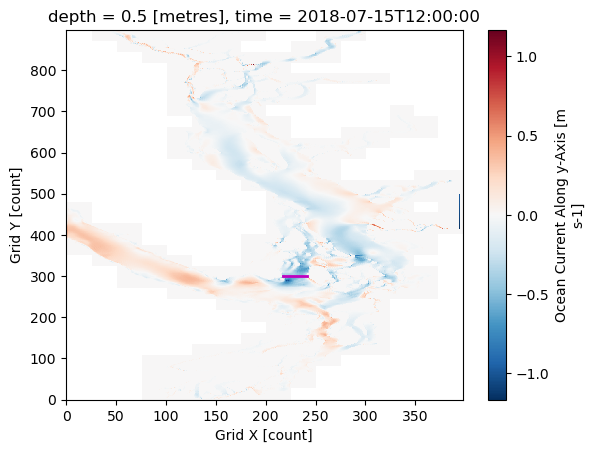

In [5]:
JanVVel = xr.open_dataset('/ocean/cstang/reshaped/SalishSeaCast_MonthlyVvel_Jan2018_20180101_20180131.nc')
JulVVel = xr.open_dataset('/ocean/cstang/reshaped/SalishSeaCast_MonthlyVvel_Jul2018_20180701_20180731.nc')

mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')

JulVVel.vomecrty[0,0].plot()
plt.plot(haro_x,haro_y,color='m',lw=2)

In [6]:
Haro_GridY = 300 - 1
Haro_GridXW = 217
Haro_GridXE = 242

JanVel_Haro = JanVVel.vomecrty[0,:,Haro_GridY,Haro_GridXW:Haro_GridXE+1]
JanFlux = JanVVel.vomecrty[0,:,Haro_GridY,Haro_GridXW:Haro_GridXE+1].values*mesh.e3v_0[0][:,Haro_GridY,Haro_GridXW:Haro_GridXE+1].values*mesh.e2v[:,Haro_GridY,Haro_GridXW:Haro_GridXE+1].values

JanFluxPos = np.sum(JanFlux[JanFlux>0])
JanFluxNeg = np.sum(JanFlux[JanFlux<0])

print(JanFluxPos,JanFluxNeg)

164699.3242265468 -155654.70647928223


In [ ]:
Ros_GridY = 267 - 1
Ros_GridXW = 284 
Ros_GridXE = 305

JanVel_Ros = JanVVel.vomecrty[0,:,Ros_GridY,Ros_GridXW:Ros_GridXE+1]
JanFlux_Ros = JanVVel.vomecrty[0,:,Ros_GridY,Ros_GridXW:Ros_GridXE+1].values*mesh.e3v_0[0][:,Ros_GridY,Ros_GridXW:Ros_GridXE+1].values*mesh.e2v[:,Ros_GridY,Ros_GridXW:Ros_GridXE+1].values

JanFluxPos_Ros = np.sum(JanFlux_Ros[JanFlux_Ros>0])
JanFluxNeg_Ros = np.sum(JanFlux_Ros[JanFlux_Ros<0])

print(JanFluxPos_Ros,JanFluxNeg_Ros)

9377.454806054262 -22929.0999128108


In [8]:
SJC_GridY = 280 
SJC_GridXW = 262
SJC_GridXE = 267

JanVel_SJC = JanVVel.vomecrty[0,:,SJC_GridY,SJC_GridXW:SJC_GridXE+1]
JanFlux_SJC = JanVVel.vomecrty[0,:,SJC_GridY,SJC_GridXW:SJC_GridXE+1].values*mesh.e3v_0[0][:,SJC_GridY,SJC_GridXW:SJC_GridXE+1].values*mesh.e2v[:,SJC_GridY,SJC_GridXW:SJC_GridXE+1].values

JanFluxPos_SJC = np.sum(JanFlux_SJC[JanFlux_SJC>0])
JanFluxNeg_SJC = np.sum(JanFlux_SJC[JanFlux_SJC<0])

print(JanFluxPos_SJC,JanFluxNeg_SJC)

10211.33590825915 -12773.175621508575


### Plot Cross Section

Text(0.5, 1.0, 'N: 10.0 mSv \n S: -13.0 mSv')

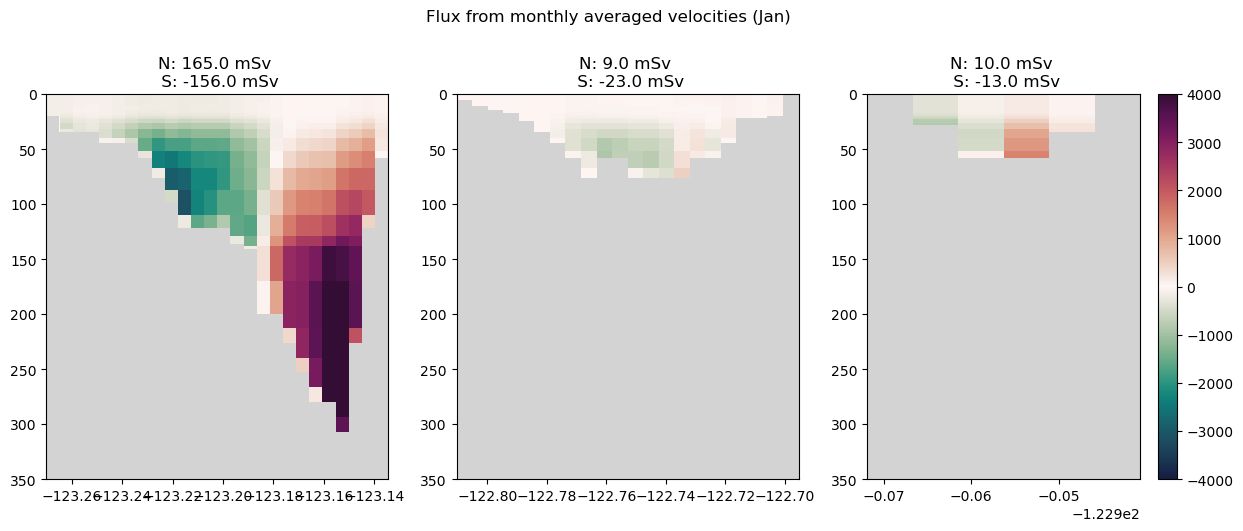

In [9]:
cmap = cm.curl

lon_haro = mesh.glamv[0,Haro_GridY,Haro_GridXW:Haro_GridXE+1]
meshZ = mesh.gdepv[0,:,300,230]
lon_ros = mesh.glamv[0,Ros_GridY,Ros_GridXW:Ros_GridXE+1]
lon_SJC = mesh.glamv[0,SJC_GridY,SJC_GridXW:SJC_GridXE+1]

fig,[ax,ax2,ax3] = plt.subplots(1,3,figsize=(15,5))

pc = ax.pcolormesh(lon_haro,meshZ,JanFlux,cmap=cmap,vmin=-4000,vmax=4000)
# plt.colorbar(pc)
ax.set_ylim(0,350)
ax.invert_yaxis()

pc = draw_patches(Haro_GridY, Haro_GridXW, Haro_GridXE, np.array(meshZ),1)
ax.add_collection(pc)

pc = ax2.pcolormesh(lon_ros,meshZ,JanFlux_Ros,cmap=cmap,vmin=-4000,vmax=4000)
# plt.colorbar(pc)
ax2.set_ylim(0,350)
ax2.invert_yaxis()

pc = draw_patches(Ros_GridY, Ros_GridXW, Ros_GridXE, np.array(meshZ),1)
ax2.add_collection(pc)

pc = ax3.pcolormesh(lon_SJC,meshZ,JanFlux_SJC,cmap=cmap,vmin=-4000,vmax=4000)
plt.colorbar(pc)
ax3.set_ylim(0,350)
ax3.invert_yaxis()

pc = draw_patches(SJC_GridY, SJC_GridXW, SJC_GridXE, np.array(meshZ),1)
ax3.add_collection(pc)

fig.suptitle('Flux from monthly averaged velocities (Jan)',y=1.05)

ax.set_title(f'N: {np.round(JanFluxPos/1000) } mSv \n S: {np.round(JanFluxNeg/1000)} mSv')
ax2.set_title(f'N: {np.round(JanFluxPos_Ros/1000) } mSv \n S: {np.round(JanFluxNeg_Ros/1000)} mSv')
ax3.set_title(f'N: {np.round(JanFluxPos_SJC/1000) } mSv \n S: {np.round(JanFluxNeg_SJC/1000)} mSv')

### July

In [10]:
JulVel_Haro = JulVVel.vomecrty[0,:,Haro_GridY,Haro_GridXW:Haro_GridXE+1]
JulFlux = JulVVel.vomecrty[0,:,Haro_GridY,Haro_GridXW:Haro_GridXE+1].values*mesh.e3v_0[0][:,Haro_GridY,Haro_GridXW:Haro_GridXE+1].values*mesh.e2v[:,Haro_GridY,Haro_GridXW:Haro_GridXE+1].values

JulFluxPos = np.sum(JulFlux[JulFlux>0])
JulFluxNeg = np.sum(JulFlux[JulFlux<0])

print(JulFluxPos,JulFluxNeg)

202854.69223183964 -165956.29639768924


In [11]:
JulVel_Ros = JulVVel.vomecrty[0,:,Ros_GridY,Ros_GridXW:Ros_GridXE+1]
JulFlux_Ros = JulVVel.vomecrty[0,:,Ros_GridY,Ros_GridXW:Ros_GridXE+1].values*mesh.e3v_0[0][:,Ros_GridY,Ros_GridXW:Ros_GridXE+1].values*mesh.e2v[:,Ros_GridY,Ros_GridXW:Ros_GridXE+1].values

JulFluxPos_Ros = np.sum(JulFlux_Ros[JulFlux_Ros>0])
JulFluxNeg_Ros = np.sum(JulFlux_Ros[JulFlux_Ros<0])

print(JulFluxPos_Ros,JulFluxNeg_Ros)

6118.325323986985 -47417.90373238651


In [12]:
JulVel_SJC = JulVVel.vomecrty[0,:,SJC_GridY,SJC_GridXW:SJC_GridXE+1]
JulFlux_SJC = JulVVel.vomecrty[0,:,SJC_GridY,SJC_GridXW:SJC_GridXE+1].values*mesh.e3v_0[0][:,SJC_GridY,SJC_GridXW:SJC_GridXE+1].values*mesh.e2v[:,SJC_GridY,SJC_GridXW:SJC_GridXE+1].values

JulFluxPos_SJC = np.sum(JulFlux_SJC[JulFlux_SJC>0])
JulFluxNeg_SJC = np.sum(JulFlux_SJC[JulFlux_SJC<0])

print(JulFluxPos_SJC,JulFluxNeg_SJC)

6686.252361717659 -16180.671695015448


Text(0.5, 1.0, 'SJC \n N: 7.0 mSv \n S: -16.0 mSv')

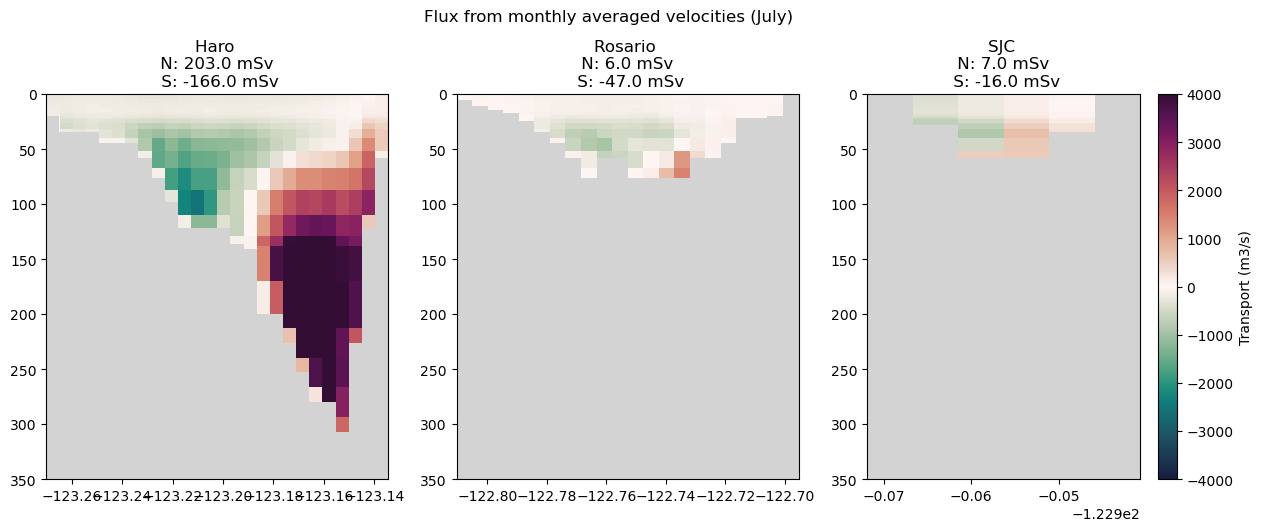

In [13]:
cmap = cm.curl

lon_haro = mesh.glamv[0,Haro_GridY,Haro_GridXW:Haro_GridXE+1]
meshZ = mesh.gdepv[0,:,300,230]
lon_ros = mesh.glamv[0,Ros_GridY,Ros_GridXW:Ros_GridXE+1]
lon_SJC = mesh.glamv[0,SJC_GridY,SJC_GridXW:SJC_GridXE+1]

fig,[ax,ax2,ax3] = plt.subplots(1,3,figsize=(15,5))

pc = ax.pcolormesh(lon_haro,meshZ,JulFlux,cmap=cmap,vmin=-4000,vmax=4000)
# plt.colorbar(pc)
ax.set_ylim(0,350)
ax.invert_yaxis()

pc = draw_patches(Haro_GridY, Haro_GridXW, Haro_GridXE, np.array(meshZ),1)
ax.add_collection(pc)

pc = ax2.pcolormesh(lon_ros,meshZ,JulFlux_Ros,cmap=cmap,vmin=-4000,vmax=4000)
# plt.colorbar(pc)
ax2.set_ylim(0,350)
ax2.invert_yaxis()

pc = draw_patches(Ros_GridY, Ros_GridXW, Ros_GridXE, np.array(meshZ),1)
ax2.add_collection(pc)

pc = ax3.pcolormesh(lon_SJC,meshZ,JulFlux_SJC,cmap=cmap,vmin=-4000,vmax=4000)
plt.colorbar(pc,label='Transport (m3/s)')
ax3.set_ylim(0,350)
ax3.invert_yaxis()

pc = draw_patches(SJC_GridY, SJC_GridXW, SJC_GridXE, np.array(meshZ),1)
ax3.add_collection(pc)

fig.suptitle('Flux from monthly averaged velocities (July)',y=1.05)

ax.set_title(f'Haro \n N: {np.round(JulFluxPos/1000) } mSv \n S: {np.round(JulFluxNeg/1000)} mSv')
ax2.set_title(f'Rosario \n N: {np.round(JulFluxPos_Ros/1000) } mSv \n S: {np.round(JulFluxNeg_Ros/1000)} mSv')
ax3.set_title(f'SJC \n N: {np.round(JulFluxPos_SJC/1000) } mSv \n S: {np.round(JulFluxNeg_SJC/1000)} mSv')

#### Combined figure

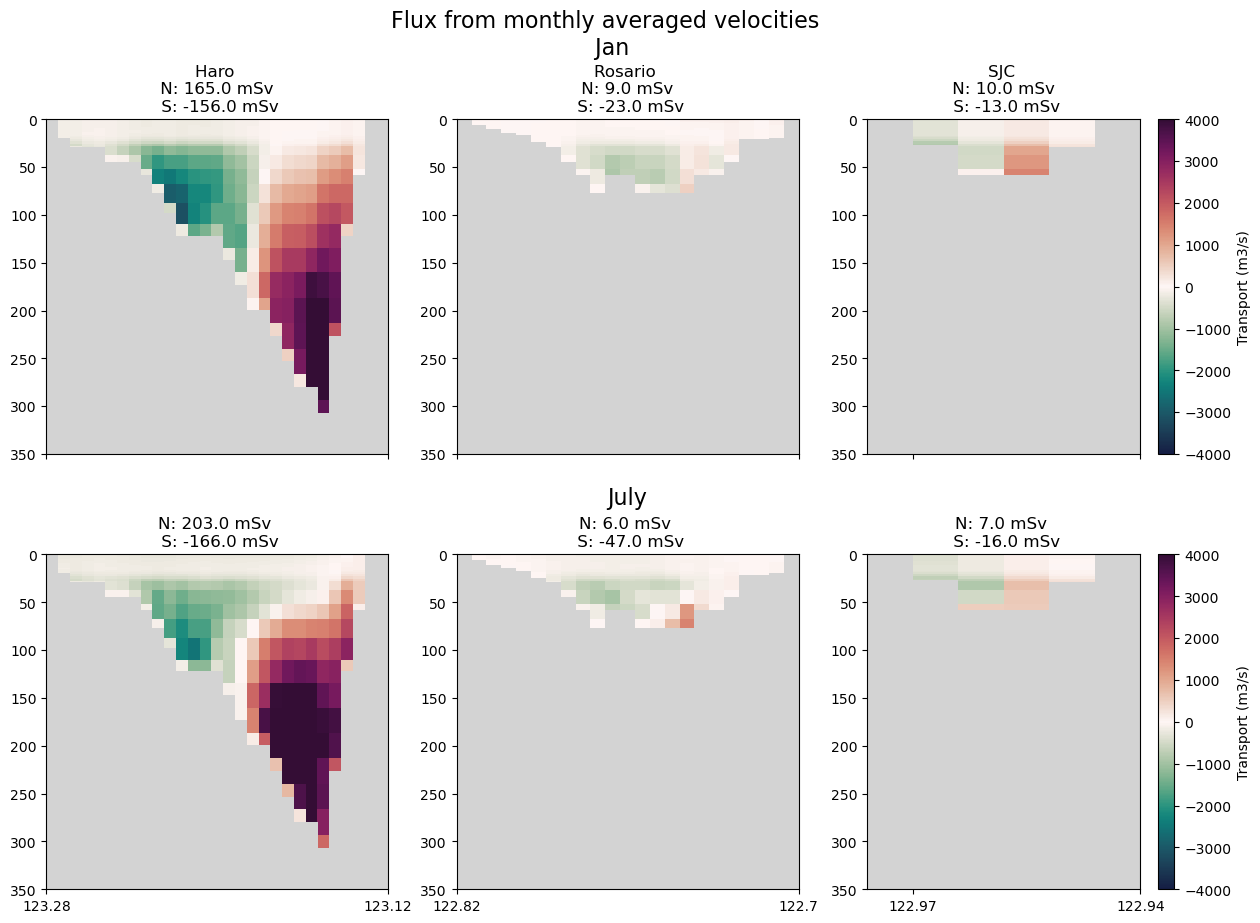

In [119]:
cmap = cm.curl

lon_haro = mesh.glamv[0,Haro_GridY,Haro_GridXW:Haro_GridXE+1]
meshZ = mesh.gdepv[0,:,Haro_GridY,Haro_GridXW]
# meshZ = mesh.gdepw_1d[0]
lon_ros = mesh.glamv[0,Ros_GridY,Ros_GridXW:Ros_GridXE+1]
lon_SJC = mesh.glamv[0,SJC_GridY,SJC_GridXW:SJC_GridXE+1]

fig,[[ax,ax2,ax3],[ax1,ax21,ax31]] = plt.subplots(2,3,figsize=(15,10))

pc = ax.pcolormesh(lon_haro,meshZ,JanFlux,cmap=cmap,vmin=-4000,vmax=4000)
# plt.colorbar(pc)
ax.set_ylim(0,350)
ax.invert_yaxis()
f_lons = mesh.glamf[0, Haro_GridY]
ax.set_xticks(np.linspace(f_lons[Haro_GridXW-2],f_lons[Haro_GridXE+2],2))
ax.set_xticklabels('')

pc = draw_patches(Haro_GridY, Haro_GridXW-2, Haro_GridXE+2, np.array(meshZ),1)
ax.add_collection(pc)

pc = ax2.pcolormesh(lon_ros,meshZ,JanFlux_Ros,cmap=cmap,vmin=-4000,vmax=4000)
# plt.colorbar(pc)
ax2.set_ylim(0,350)
ax2.invert_yaxis()
f_lons = mesh.glamf[0, Ros_GridY]
ax2.set_xticks(np.linspace(f_lons[Ros_GridXW-2],f_lons[Ros_GridXE],2))
ax2.set_xticklabels('')

pc = draw_patches(Ros_GridY, Ros_GridXW-2, Ros_GridXE, meshZ,1)
ax2.add_collection(pc)

pc = ax3.pcolormesh(lon_SJC,meshZ,JanFlux_SJC,cmap=cmap,vmin=-4000,vmax=4000)
plt.colorbar(pc,label='Transport (m3/s)')
ax3.set_ylim(0,350)
ax3.invert_yaxis()
f_lons = mesh.glamf[0, SJC_GridY]
ax3.set_xticks(np.linspace(f_lons[SJC_GridXW],f_lons[SJC_GridXE],2))
ax3.set_xticklabels('')
# ax3.colorbar(pc,label='Transport (m3/s)')

pc = draw_patches(SJC_GridY, SJC_GridXW, SJC_GridXE, meshZ,1)
ax3.add_collection(pc)

fig.suptitle(f'Flux from monthly averaged velocities \n Jan',y=0.99,fontsize=16)
ax.set_title(f'Haro \n N: {np.round(JanFluxPos/1000) } mSv \n S: {np.round(JanFluxNeg/1000)} mSv')
ax2.set_title(f'Rosario \n N: {np.round(JanFluxPos_Ros/1000) } mSv \n S: {np.round(JanFluxNeg_Ros/1000)} mSv')
ax3.set_title(f'SJC \n N: {np.round(JanFluxPos_SJC/1000) } mSv \n S: {np.round(JanFluxNeg_SJC/1000)} mSv')

pc = ax1.pcolormesh(lon_haro,meshZ,JulFlux,cmap=cmap,vmin=-4000,vmax=4000)
# plt.colorbar(pc)
ax1.set_ylim(0,350)
ax1.invert_yaxis()
f_lons = mesh.glamf[0, Haro_GridY]
ax1.set_xticks(np.linspace(f_lons[Haro_GridXW-2],f_lons[Haro_GridXE+2],2))
ax1.xaxis.set_major_formatter(FormatStrFormatter(f"%.{2}f"))
ax1.set_xticklabels(np.round(np.linspace(np.abs(f_lons[Haro_GridXW-2]),np.abs(f_lons[Haro_GridXE+2]),2),2))

pc = draw_patches(Haro_GridY, Haro_GridXW-2, Haro_GridXE+2, meshZ,1)
ax1.add_collection(pc)

pc = ax21.pcolormesh(lon_ros,meshZ,JulFlux_Ros,cmap=cmap,vmin=-4000,vmax=4000)
# plt.colorbar(pc)
ax21.set_ylim(0,350)
ax21.invert_yaxis()
f_lons = mesh.glamf[0, Ros_GridY]
ax21.set_xticks(np.linspace(f_lons[Ros_GridXW-2],f_lons[Ros_GridXE],2))
ax21.xaxis.set_major_formatter(FormatStrFormatter(f"%.{2}f"))
ax21.set_xticklabels(np.round(np.linspace(np.abs(f_lons[Ros_GridXW-2]),np.abs(f_lons[Ros_GridXE]),2),2))

pc = draw_patches(Ros_GridY, Ros_GridXW-2, Ros_GridXE, meshZ,1)
ax21.add_collection(pc)

pc = ax31.pcolormesh(lon_SJC,meshZ,JulFlux_SJC,cmap=cmap,vmin=-4000,vmax=4000)
plt.colorbar(pc,label='Transport (m3/s)')
ax31.set_ylim(0,350)
ax31.invert_yaxis()
f_lons = mesh.glamf[0, SJC_GridY]
ax31.set_xticks(np.linspace(f_lons[SJC_GridXW],f_lons[SJC_GridXE],2))
ax31.xaxis.set_major_formatter(FormatStrFormatter(f"%.{2}f"))
ax31.set_xticklabels(np.round(np.linspace(np.abs(f_lons[SJC_GridXW]),np.abs(f_lons[SJC_GridXE]),2),2))

pc = draw_patches(SJC_GridY, SJC_GridXW, SJC_GridXE, np.array(meshZ),1)
ax31.add_collection(pc)

ax21.text(0.5, 1.15, 'July', transform=ax21.transAxes, ha='center',fontsize = 16)

ax1.set_title(f'N: {np.round(JulFluxPos/1000) } mSv \n S: {np.round(JulFluxNeg/1000)} mSv')
ax21.set_title(f'N: {np.round(JulFluxPos_Ros/1000) } mSv \n S: {np.round(JulFluxNeg_Ros/1000)} mSv')
ax31.set_title(f'N: {np.round(JulFluxPos_SJC/1000) } mSv \n S: {np.round(JulFluxNeg_SJC/1000)} mSv')

fig.subplots_adjust(hspace=0.3)

In [104]:
def draw_patches(gridY,ll, ul, w_depths,m2lon,back=False):
    latgridf = gridY
    fmask = mesh.vmask[0, :, latgridf]
    tmask = mesh.tmask[0,:,latgridf]
            
    f_lons = mesh.glamf[0, latgridf]
    u_lons = mesh.glamf[0, latgridf]
    # w_depths = mesh.gdepw_1d[0]
    # w_depths = mesh.gdepv[0,:,300,230]

    topo = []
    if back == False: 
        for i in range(ll, ul+1):
            for j in range(39):
                if (fmask[j, i]== 0):
                    try:
                        rect = Rectangle((u_lons[i-1]/m2lon, w_depths[j-1]), u_lons[i]/m2lon-u_lons[i-1]/m2lon, w_depths[j]-w_depths[j-1])
                        topo.append(rect)
                    except:
                        pass
    else:
         for i in range(ll, ul+2):
            for j in range(39):
                if (fmask[j, i]== 0):
                    try:
                        rect = Rectangle((u_lons[i-2]/m2lon, w_depths[j]), u_lons[i-1]/m2lon-u_lons[i-2]/m2lon, w_depths[j+1]-w_depths[j])
                        topo.append(rect)
                    except:
                        pass         
    pc = PatchCollection(topo, facecolors='lightgray', edgecolors='none')
    return(pc)